In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task

The purpose of this notebook is to use imdb viewers' rating in order to better understand which episodes got higher rankings and the more important question - Why?

Other than that, I will try to detect patterns in the data, for example: "Is there any repeating motive in a specific director's episodes"?

The ranking related questions I will try to answer:
1. Which season got the highest average ranking?
2. Which episode got the highest average ranking?
3. Which director got the highest average ranking? What was special about his episodes?

First let's read our data and take a look on the features we have.

In [157]:
data = pd.read_csv("./friends.csv")
data.head()

,Year_of_prod,Season,Episode_Title,Duration,Summary,Director,Stars,Votes
0,1994,1,The One with the Sonogram at the End,22,Ross finds out his ex-wife is pregnant. Rachel...,James Burrows,8.1,4888
1,1994,1,The One with the Thumb,22,Monica becomes irritated when everyone likes h...,James Burrows,8.2,4605
2,1994,1,The One with George Stephanopoulos,22,Joey and Chandler take Ross to a hockey game t...,James Burrows,8.1,4468
3,1994,1,The One with the East German Laundry Detergent,22,"Eager to spend time with Rachel, Ross pretends...",Pamela Fryman,8.5,4438
4,1994,1,The One with the Butt,22,Monica's obsessiveness is put to the test afte...,Arlene Sanford,8.1,4274


An interesting observation (below) is that even though we know that the "Friends" series became more and more popular over the years, the voting rates decrease as the years pass (except for season 10).

Text(0.5, 1.0, 'Average number of votes for each season')

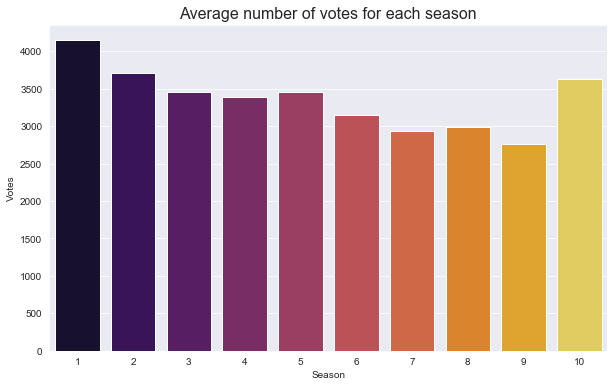

In [158]:
votes = data.groupby('Season', as_index=False)['Votes'].mean().sort_values(by=['Votes'])

plt.figure(figsize=(10,6))
sns.set_style('darkgrid')

sns.barplot(x='Season',y='Votes', data=votes, palette='inferno')
plt.title("Average number of votes for each season", fontsize=16)

**Seasons**

Let's see which seasons got the highest rankings.

Text(0.5, 1.0, 'Average ranking for each season')

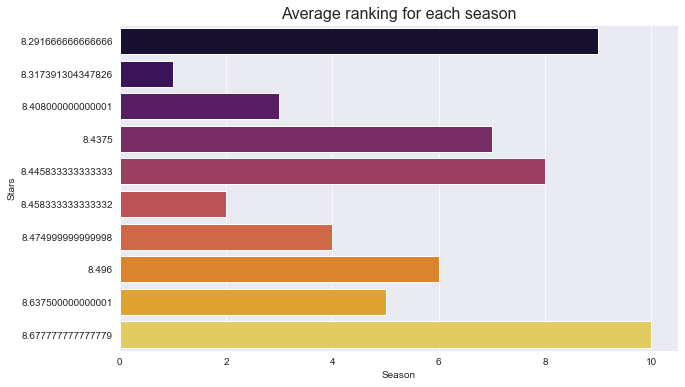

In [159]:
votes = data.groupby('Season', as_index=False)['Stars'].mean().sort_values(by=['Stars'])

plt.figure(figsize=(10,6))
sns.barplot(x='Season',y='Stars', data=votes, palette='inferno', orient='h')
plt.title("Average ranking for each season", fontsize=16)

The 9th and 10th (last) seasons got the highest rankings and the 1st season got the lowest ranking.

It is not much of a surprise since on the last season the viewer is much more attached to the plot and the characters of the series.

**Episodes**

Which episodes were top ranked? Why? Let's find out!

Text(0.5, 1.0, 'Top 10 ranked episodes')

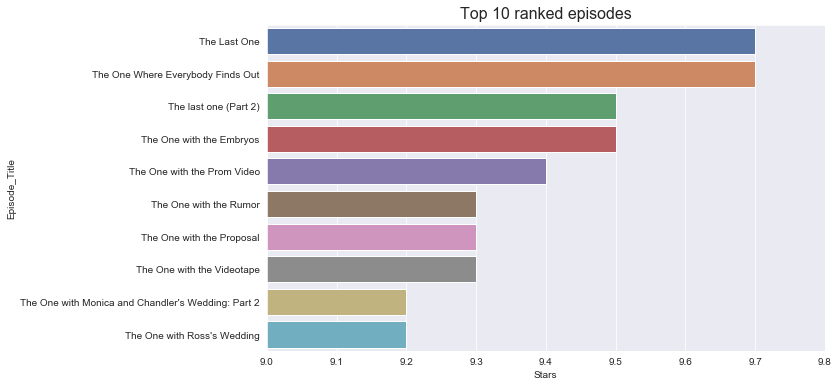

In [160]:
# Get top 10 ranked episodes
top_ten = data[['Season', 'Episode_Title', 'Stars', 'Director']].sort_values(by=['Stars'], ascending=False).head(10)

# The last episode had 2 parts, change the second part to Part 2.
top_ten['Episode_Title'][233] = 'The last one (Part 2)'

plt.figure(figsize=(10,6))
sns.barplot(x='Stars',y='Episode_Title', data=top_ten, orient='h', palette="deep")

plt.xticks(np.arange(9,9.8, 0.1))
plt.xlim(9,9.8)
plt.title("Top 10 ranked episodes", fontsize=16)

From this plot we can conclude the following:
1. Viewers loved the last episodes the most.
2. Wedding related episodes were highly scored.
3. Episodes where the plot focused on the relationships of Ross & Rachel / Chandler & Monica were highly scored.

**Directors**

In my analysis I decided to consider only the directors who directed the biggest number of episodes. The motivation was that I didn't think it would be fair to compare directors with many episodes to those with a small number. (Would you compare career acheivements of a singer with 1 song to a singer with 3 albums?)

In [161]:
directors =[]
num_episodes = []
for director in data['Director'].unique():
    num_ep = len(data.loc[data['Director'] == director])
    directors.append(director)
    num_episodes.append(num_ep)

num_epis = pd.DataFrame({'Director' : directors, 'Num_episodes' : num_episodes}).sort_values(by=['Num_episodes'], ascending=False)
num_epis.head(10)

,Director,Num_episodes
17,Gary Halvorson,54
9,Kevin Bright,54
6,Michael Lembeck,24
0,James Burrows,14
7,Gail Mancuso,14
3,Peter Bonerz,12
24,Ben Weiss,10
23,David Schwimmer,10
16,Shelley Jensen,6
8,Robby Benson,6


In [162]:
# Let's consider only directors with 10 episodes or more
most_epis_dir = num_epis.loc[num_epis.Num_episodes>=10]
most_epis_dir

,Director,Num_episodes
17,Gary Halvorson,54
9,Kevin Bright,54
6,Michael Lembeck,24
0,James Burrows,14
7,Gail Mancuso,14
3,Peter Bonerz,12
24,Ben Weiss,10
23,David Schwimmer,10


In [163]:
top_directors = most_epis_dir.Director.to_list()

top = data[data['Director'].isin(top_directors)]
top.groupby('Director', as_index=False)['Stars'].mean().sort_values(by=['Stars'], ascending=False)

,Director,Stars
5,Kevin Bright,8.646296
1,David Schwimmer,8.540000
6,Michael Lembeck,8.520833
4,James Burrows,8.514286
3,Gary Halvorson,8.401852
2,Gail Mancuso,8.357143
7,Peter Bonerz,8.325000
0,Ben Weiss,8.300000


It looks like Kevin Bright had the biggest number of episodes directed and also the highest rank!
Let's try to further understand the episodes he directed.

In [168]:
top_ten.loc[top_ten['Director']=='Kevin Bright']

,Season,Episode_Title,Stars,Director
234,10,The Last One,9.7,Kevin Bright
233,10,The last one (Part 2),9.5,Kevin Bright
83,4,The One with the Embryos,9.5,Kevin Bright
144,6,The One with the Proposal,9.3,Kevin Bright
172,8,The One with the Videotape,9.3,Kevin Bright
168,7,The One with Monica and Chandler's Wedding: Pa...,9.2,Kevin Bright
95,4,The One with Ross's Wedding,9.2,Kevin Bright


7 out the 10 top ranked episodes were directed by Kevin Bright.